<a href="https://colab.research.google.com/github/andreaaraldo/machine-learning-for-networks/blob/master/04.neural_networks/04bis_regularization_of_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

If you run this on Google Colab, change the environment to TPU or GPU

In [1]:
!pip install tensorflow

In [2]:

# The following library is to plot the loss during training
# https://github.com/stared/livelossplot
! pip install livelossplot


# Import the visualization and neural network libraries I prepared for you
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
! wget https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/neural_network_tools.py
from visualization import plot_conf_mat
from neural_network_tools import enforce_reproducibility, make_sequential_model, train_model


# The following is to be able to mount Google Drive
from google.colab import drive

import os
from os.path import isfile



--2025-09-27 10:15:21--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/visualization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13023 (13K) [text/plain]
Saving to: ‘visualization.py’

visualization.py    100%[===================>]  12.72K  --.-KB/s    in 0.001s  

2025-09-27 10:15:21 (19.9 MB/s) - ‘visualization.py’ saved [13023/13023]

--2025-09-27 10:15:21--  https://raw.githubusercontent.com/andreaaraldo/machine-learning-for-networks/master/course_library/neural_network_tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connec

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime # Import the datetime module


from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report




### Mount your Google Drive

Training a neural network may take long time and you don't want to do it every time. Once you've trained a model, it is better to save it, so that you can use it immediately for prediction next times.

Unfortunately, the storage on Google is reset every time. You need to store all persistent data in you Google Drive.

You need therefore to mount your Google Drive, which you will use later in this notebook

In [4]:
mount_point = '/content/gdrive' # Always the same, don't change it
drive.mount(mount_point, force_remount=True)
drive_path = mount_point + '/My Drive/' # Always the same, don't change it

# Replace the following folder with some folder inside your google drive
my_path = drive_path + \
  'tsp/teaching/data-science-for-networks/img-from-code/04.neural-networks/'

Mounted at /content/gdrive


Load the training and tes dataset

In [5]:
X_train = pd.read_csv(my_path + 'X_train.csv', header=None).values
X_test = pd.read_csv(my_path + 'X_test.csv', header=None).values
y_train = pd.read_csv(my_path + 'y_train.csv', header=None).values
y_test = pd.read_csv(my_path + 'y_test.csv', header=None).values

Let's see if we can improve the deep architecture we analyzed in the previous notebook. We found that it is worse than the smaller architecture, however
*will the deep architecture perform better if we regularize it?*

We use dropout regularization

In [6]:
num_of_classes = y_train.shape[1]
sample_size = X_train.shape[1]
deep_architecture = [8, 8 ,8, 8, 8, 8, 8, 8, 8, num_of_classes]
model = make_sequential_model(sample_size, deep_architecture,
                              learning_rate=0.01, dropout_keep_prob=0.5)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │            45 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693 (2.71 KB)

 Trainable params: 693 (2.71 KB)

 Non-trainable params: 0 (0.00 B)

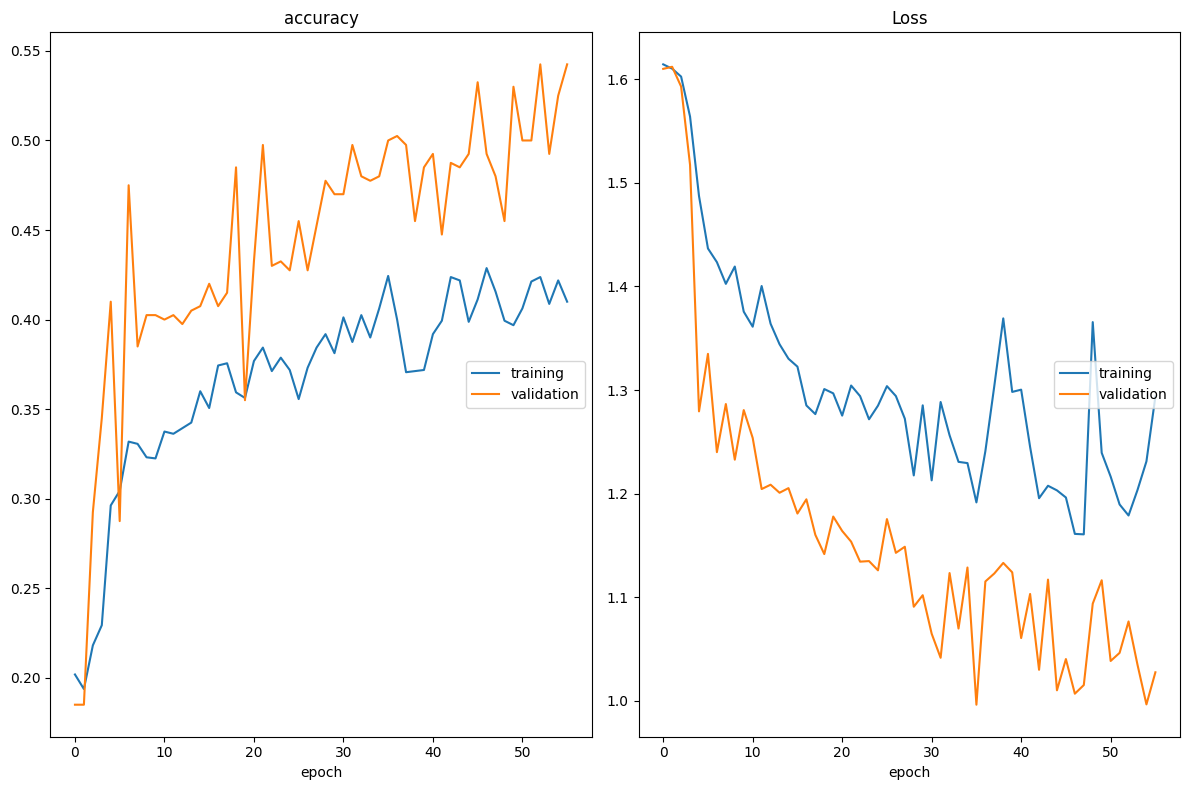

accuracy
	training         	 (min:    0.194, max:    0.429, cur:    0.410)
	validation       	 (min:    0.185, max:    0.543, cur:    0.543)
Loss
	training         	 (min:    1.161, max:    1.614, cur:    1.294)
	validation       	 (min:    0.996, max:    1.612, cur:    1.028)
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4238 - loss: 1.4248 - val_accuracy: 0.5425 - val_loss: 1.0276
Epoch 56: early stopping
Restoring model weights from the end of the best epoch: 36.


In [7]:
nn_file = my_path + 'nn-deep-dropoutkp_0.5-lr_0.01.keras'
history = train_model(model, nn_file, X_train, y_train, seed=5, max_epochs=800,
                      overwrite=True, patience=20)

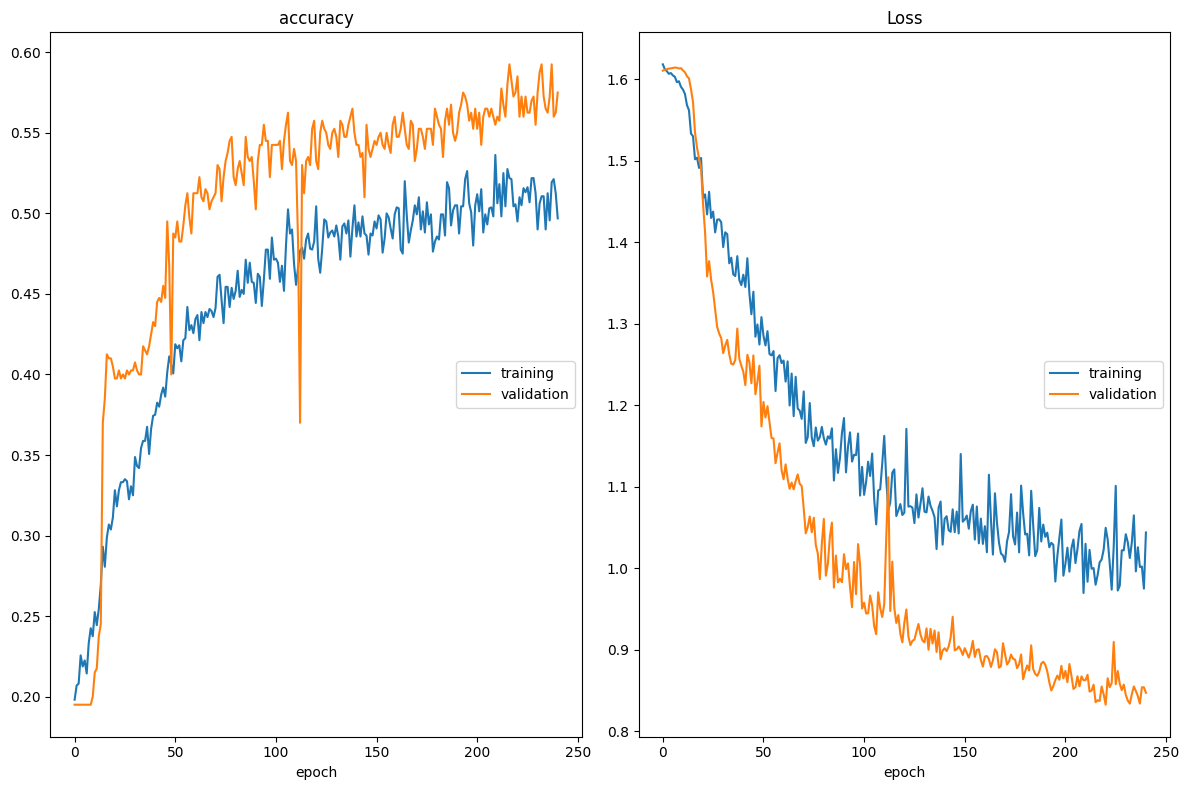

accuracy
	training         	 (min:    0.198, max:    0.536, cur:    0.497)
	validation       	 (min:    0.195, max:    0.592, cur:    0.575)
Loss
	training         	 (min:    0.970, max:    1.618, cur:    1.044)
	validation       	 (min:    0.833, max:    1.614, cur:    0.847)
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4994 - loss: 1.0786 - val_accuracy: 0.5750 - val_loss: 0.8474
Epoch 241: early stopping
Restoring model weights from the end of the best epoch: 221.


In [10]:
nn_file = my_path + 'nn-deep-dropoutkp_0.5-lr_0.001.keras'
model = make_sequential_model(sample_size, deep_architecture,
                              learning_rate=0.001, dropout_keep_prob=0.5)
history = train_model(model, nn_file, X_train, y_train, seed=5, max_epochs=800,
                      overwrite=True, patience=20
                      )

Maybe we exagerated in dropping neurons. Let us try with a higher `keep_probability`

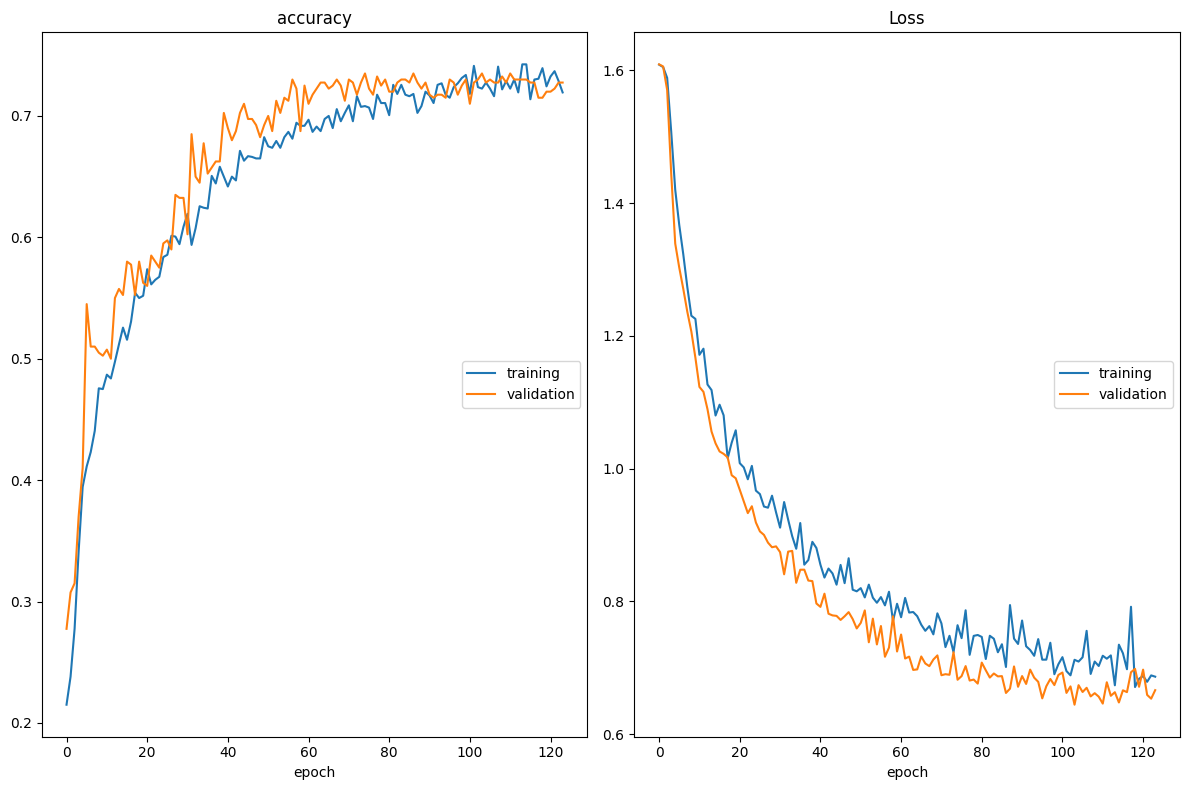

accuracy
	training         	 (min:    0.215, max:    0.743, cur:    0.719)
	validation       	 (min:    0.278, max:    0.735, cur:    0.728)
Loss
	training         	 (min:    0.671, max:    1.608, cur:    0.687)
	validation       	 (min:    0.644, max:    1.609, cur:    0.666)
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7362 - loss: 0.6809 - val_accuracy: 0.7275 - val_loss: 0.6663
Epoch 124: early stopping
Restoring model weights from the end of the best epoch: 104.


In [11]:
nn_file = my_path + 'nn-deep-dropoutkp_0.8-lr_0.001.keras'
model = make_sequential_model(sample_size, deep_architecture,
                              learning_rate=0.001, dropout_keep_prob=0.8)
history = train_model(model, nn_file, X_train, y_train, seed=5, max_epochs=800,
                      overwrite=True, patience=20
                      )

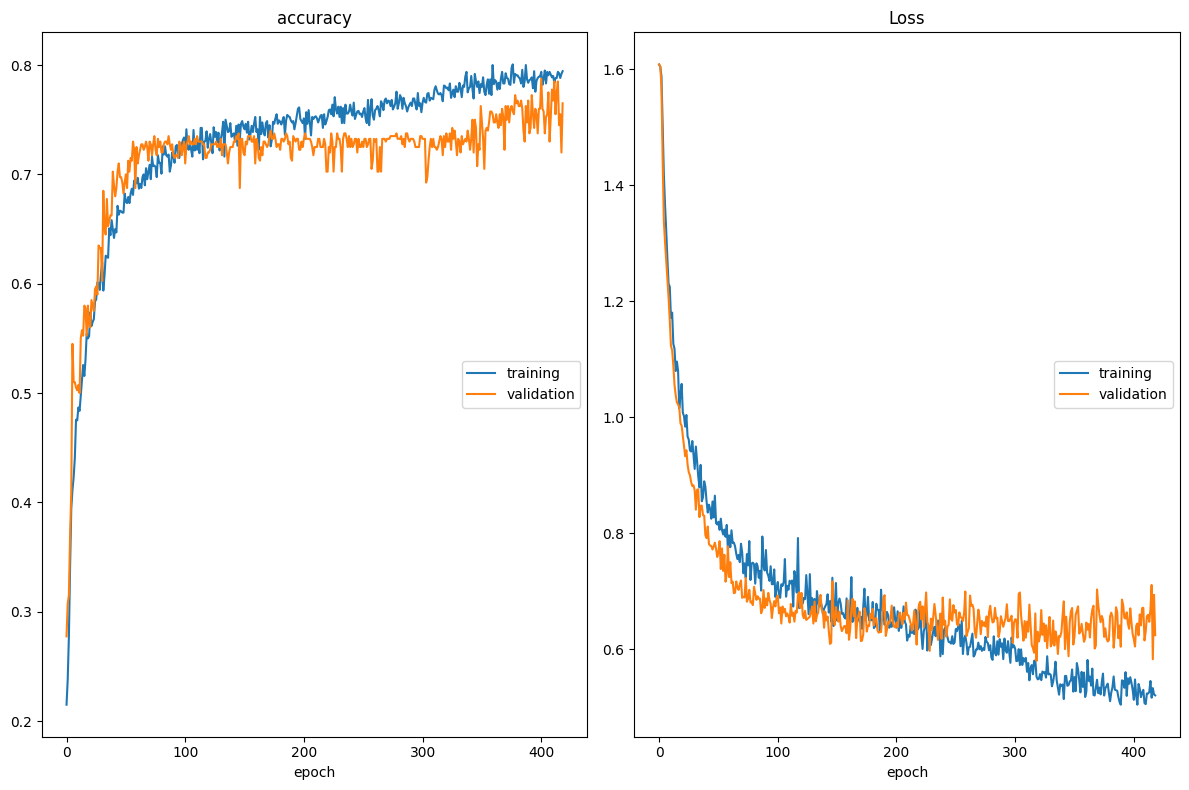

accuracy
	training         	 (min:    0.215, max:    0.801, cur:    0.794)
	validation       	 (min:    0.278, max:    0.788, cur:    0.765)
Loss
	training         	 (min:    0.504, max:    1.608, cur:    0.521)
	validation       	 (min:    0.580, max:    1.609, cur:    0.624)
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7980 - loss: 0.5314 - val_accuracy: 0.7650 - val_loss: 0.6243
Epoch 419: early stopping
Restoring model weights from the end of the best epoch: 319.


In [12]:
nn_file = my_path + 'nn-deep-dropoutkp_0.8-lr_0.001.keras'
model = make_sequential_model(sample_size, deep_architecture,
                              learning_rate=0.001, dropout_keep_prob=0.8)
history = train_model(model, nn_file, X_train, y_train, seed=5, max_epochs=800,
                      overwrite=True, patience=100
                      )

Due to early stopping, we stopped too soon.
We previously used a patience=20, which was working fine. However, dropout "perturbs" training in some epochs and validation error might not alway tend to decrease as without dropout.

This is why, to let dropout operate its perturbations without stopping too soon, I suggest to increase patience.

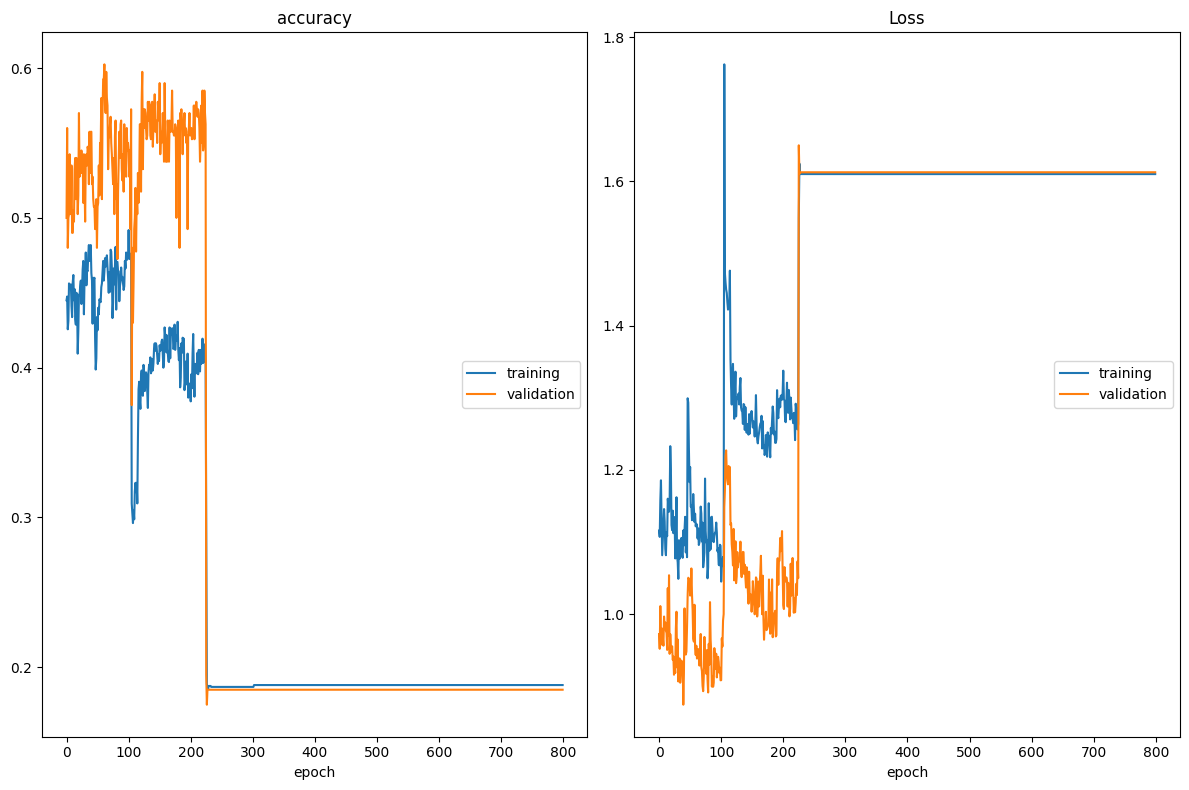

accuracy
	training         	 (min:    0.186, max:    0.492, cur:    0.188)
	validation       	 (min:    0.175, max:    0.603, cur:    0.185)
Loss
	training         	 (min:    1.045, max:    1.762, cur:    1.610)
	validation       	 (min:    0.874, max:    1.650, cur:    1.613)
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1896 - loss: 1.6091 - val_accuracy: 0.1850 - val_loss: 1.6127
Restoring model weights from the end of the best epoch: 40.


In [12]:
nn_file = my_path + 'nn-deep-dropoutkp_0.5-lr_0.01.keras'
history = train_model(model, nn_file, X_train, y_train, seed=5, max_epochs=800,
                      overwrite=True, patience=800
                      )

# Prediction

Let's use the model for prediction.

In [ ]:
nn_file = my_path + 'nn-0.01.keras'
model = load_model(nn_file)

Get the probability for each sample of being in a class.

In [ ]:
y_proba = model.predict(X_test)
print( 'y_proba\n', y_proba)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
y_proba
 [[5.4482847e-01 3.2056635e-04 3.7792063e-01 1.3136801e-09 7.6930262e-02]
 [4.7020864e-01 1.4362902e-04 1.6564582e-04 6.8397781e-06 5.2947527e-01]
 [3.0496168e-01 1.5611136e-05 1.4047033e-06 1.1214829e-05 6.9501013e-01]
 ...
 [3.0496168e-01 1.5611122e-05 1.4047008e-06 1.1214807e-05 6.9501013e-01]
 [7.3910855e-02 1.8999148e-07 4.2455962e-11 1.4293760e-04 9.2594606e-01]
 [3.0496168e-01 1.5611122e-05 1.4047008e-06 1.1214807e-05 6.9501013e-01]]


The predicted class of each sample is the one with the highest probability.

In [ ]:
pred_proba = model.predict(X_test)
pred_label = np.argmax(pred_proba,axis=1)
print( 'pred_label\n', pred_label )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
pred_label
 [0 4 4 0 2 4 0 2 4 0 4 4 0 0 0 0 4 0 0 4 0 4 4 0 0 2 2 4 4 0 4 4 0 4 4 2 4
 4 0 0 0 4 4 0 2 0 0 4 0 0 0 4 4 4 0 4 0 4 0 0 0 0 2 0 4 0 4 0 0 4 4 4 4 4
 0 4 0 4 0 2 4 4 4 0 0 0 0 4 4 0 0 0 0 4 0 4 4 0 0 0 0 2 0 0 2 0 0 0 0 2 0
 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 2 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 4 4 4 4 0 4 4 4 4 0 4 0 4 0 4 4 4 4 4 4 4 0
 4 4 0 4 4 4 4 4 4 4 4 4 4 4 0 4 4 0 4 0 4 0 4 4 0 4 4 0 4 0 4 4 0 4 0 4 4
 0 4 4 0 4 4 4 4 4 0 4 4 0 0 4 4 4 4 4 4 0 4 4 4 0 4 4 4 4 4 4 0 0 0 0 4 0
 4 0 4 4 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

The best way to evaluate the model is the confusion matrix

In [ ]:
y_test.values

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

We need to convert one-hot-encoded values to numerical labels

In [ ]:
true_label = np.argmax(y_test.values, axis=1)
true_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

Normalized confusion matrix
[[0.60333333 0.15166667 0.05333333 0.19166667]
 [0.1        0.9        0.         0.        ]
 [       nan        nan        nan        nan]
 [0.09       0.         0.         0.91      ]]


/content/visualization.py:123: RuntimeWarning: invalid value encountered in divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

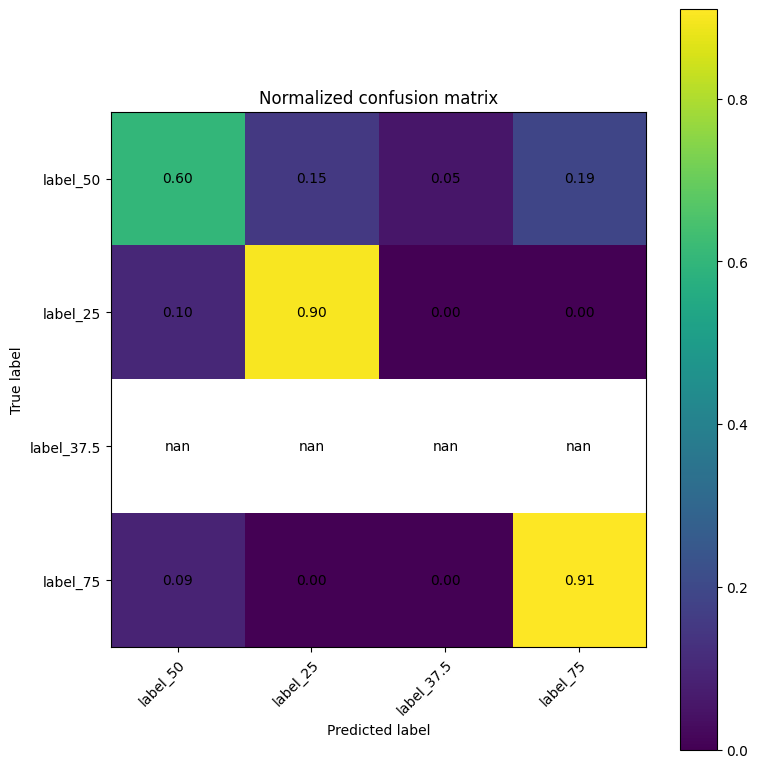

In [ ]:
plot_conf_mat(true_label, pred_label, np.array(class_names) )

In [ ]:
print("The names of the classes are ", class_names)
print("The true classes found in the test set are ", Counter(true_label) )
print("The predicted classes are ", Counter(pred_label) )

The names of the classes are  ['label_50', 'label_25', 'label_37.5', 'label_12.5', 'label_75']
The true classes found in the test set are  Counter({np.int64(0): 600, np.int64(1): 300, np.int64(4): 100})
The predicted classes are  Counter({np.int64(0): 401, np.int64(1): 361, np.int64(4): 206, np.int64(2): 32})


Observe that class `3`, i.e., `label_37.5` is predicted by the model but does not appear in the test set. This is why it appear as `nan` in the confusion matrix.

Observe also that class `4`, i.e., `label_12.5` does not appear neither in the true labels of the test set, nor in the predicted labels. For this reason it does not appear in the confusion matrix.

In [ ]:
print( classification_report(true_label, pred_label, labels=[0,1,2,3,4],
                             target_names=class_names) )

              precision    recall  f1-score   support

    label_50       0.90      0.60      0.72       600
    label_25       0.75      0.90      0.82       300
  label_37.5       0.00      0.00      0.00         0
  label_12.5       0.00      0.00      0.00         0
    label_75       0.44      0.91      0.59       100

    accuracy                           0.72      1000
   macro avg       0.42      0.48      0.43      1000
weighted avg       0.81      0.72      0.74      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

# References

* [Ge19] Geron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2019, O'Reilly